In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.integrate as spint

# Exercise 1:

In [2]:
#Poker with 3 cards problem:Making a card trap

rank=np.arange(1,14)
colour=['Heart','Spades','Diamond','Clubs']
cards=[]
for i in range(0,13):
    for j in colour:
        element=(rank[i],j)
        cards.append(element)

In [3]:
#Poker with 3 cards problem:Solution 3

import random
none=0
flush=0
staight=0
flush_staight=0

flush_1=0
staight_1=0
flush_staight_1=0

for j in range(0,1000000):
    draw=random.sample(range(0, 52), 3)
    f=(cards[draw[0]][1]==cards[draw[1]][1])
    f*=(cards[draw[0]][1]==cards[draw[2]][1])
    
    q=sorted([cards[draw[0]][0],cards[draw[1]][0],cards[draw[2]][0]])
    st=(q[1]-q[0]==1)
    st*=(q[2]-q[1]==1)

    if f==True and st==True:
        flush_staight+=1
    elif f==True:
        flush+=1
    elif st==True:
        staight+=1
    else:
        none+=1
    
    if j%12==0:
        if f==True and st==True:
            flush_staight_1+=1
        elif f==True:
            flush_1+=1
        elif st==True:
            staight_1+=1
    


tries=j+1
tries_1=(j+1)/12

print("Flush:",100*flush/tries,"%")
print("Staight:",100*staight/tries,"%")
print("Flush Staight:",100*flush_staight/tries,"% \n")

print("For the 12th player:")
print("Flush:",100*flush_1/tries_1,"%")
print("Staight:",100*staight_1/tries_1,"%")
print("Flush Staight:",100*flush_staight_1/tries_1,"%")

Flush: 4.9811 %
Staight: 2.9744 %
Flush Staight: 0.193 % 

For the 12th player:
Flush: 4.9752 %
Staight: 2.9028 %
Flush Staight: 0.1872 %


The results above shows that the probability is almost the same regardless the "turn" of the player,with more "games" better accuracy would be expected.

# Exercise 2:

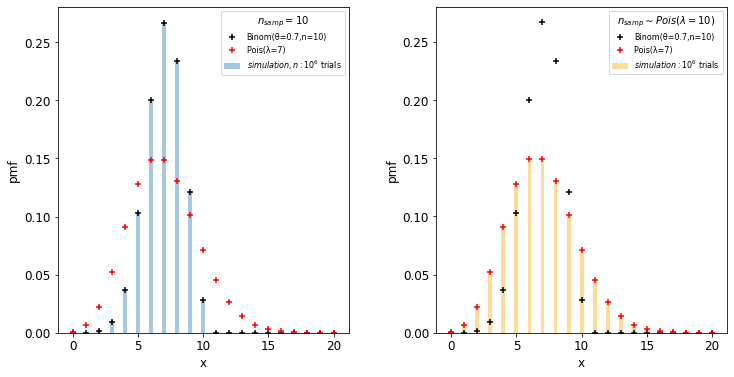

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

theta = 0.7
n=10
lam=7
size=1000000
bins = np.linspace(-0.5,20.5,22)

fix_size,dx=np.histogram(sps.binom.rvs(n=n,p=theta,size=size),bins=bins)
sample_size=sps.poisson.rvs(mu=n,size=size)
abs_sample,dx=np.histogram(sps.binom.rvs(n=sample_size,p=theta),bins=bins)
x=(dx[1:]+dx[:-1])/2.
x=x.astype(int)

ax1.bar(x, fix_size/1000000, width=0.3 , alpha=0.4, label='$ simulation,n:10^{6}$ trials')
ax1.scatter(x, sps.binom.pmf(x,n,p=theta),c="black", marker="+", label='Binom(θ=0.7,n=10)')
ax1.scatter(x, sps.poisson.pmf(x,mu=lam),c="red",  marker="+", label='Pois(λ=7) ')

ax2.bar(x, abs_sample/1000000, width=0.3 ,color="orange", alpha=0.4, label='$ simulation:10^{6}$ trials')
ax2.scatter(x, sps.binom.pmf(x,n,p=theta),c="black",  marker="+", label='Binom(θ=0.7,n=10)')
ax2.scatter(x, sps.poisson.pmf(x,mu=lam),c="red",  marker="+", label='Pois(λ=7) ')

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel("x", fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
ax1.set_ylabel("pmf", fontsize=12)
ax2.set_ylabel("pmf", fontsize=12)
ax1.legend(fontsize=8,title=r'$n_{samp}=10$')
ax2.legend(fontsize=8,title=r'$n_{samp} \sim Pois(λ=10)$')
plt.show()

binomial distribution: $p(x|n,p)=\frac{n!}{(n-x)! x!} p^{x} (1-p)^{n-x}$

We assume that $ p =\lambda / n  $ ,with n:sample size,p:success rate.

$p(x|n,\lambda/n)=\frac{n!}{(n-x)! x!} \frac{\lambda^{x}}{n^{x}} (1-\frac{\lambda}{n})^{n-x}$

$p(x|\lambda) = \frac{\lambda^{x} \cdot e^{- \lambda}}{x!} \Leftarrow \begin{cases} \lim_{n \to \infty} f(x) = (1-\frac{\lambda}{n})^{n-x}=e^{-\lambda} \\ \frac{n!}{(n-x)!} = \prod_{i=0}^{x-1} (n-i) \rightarrow n^{x} \end{cases} $ 

So the binomial distribution for an absatract and big sample value leads to a poisson distribution with $\lambda=n \cdot p =10 \cdot 0.7 =7$,which agrees with the result above.


# Exercise 3:

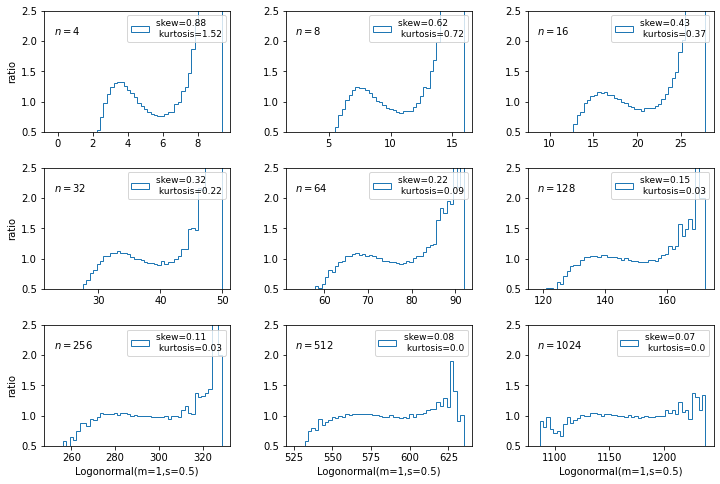

In [5]:
ntrials = 100000
nsamp = [4,8,16,32,64,128,256,512,1024]
lnorm = sps.lognorm(loc=0,scale=1,s=0.5)
l_var = lnorm.var()
l_mean = lnorm.mean()
n = 0
fig, ax = plt.subplots(3,3, figsize=(12,8))
fig.subplots_adjust(wspace=0.3,hspace=0.3)

for i in range(3):
    for j in range(3):
        l_rand = lnorm.rvs(size=(ntrials,nsamp[n]))
        exp_var = nsamp[n]*l_var
        exp_mean = nsamp[n]*l_mean
        nd = sps.norm(loc=exp_mean,scale=np.sqrt(exp_var))
        plot_range = (exp_mean-4*np.sqrt(exp_var),exp_mean+4*np.sqrt(exp_var))
        dens, edges = np.histogram(np.sum(l_rand,axis=1), bins=50, range=plot_range,density=True)
        norm_pdf = (nd.cdf(edges[1:])-nd.cdf(edges[:-1]))/np.diff(edges)
        
        skew=sps.stats.skew(np.sum(l_rand,axis=1))
        kurtosis=sps.stats.kurtosis(np.sum(l_rand,axis=1))
        label_txt = r"skew="+str(np.round(skew,2))+" \n kurtosis="+str(np.round(kurtosis,2))
        
        ax[i,j].hist((edges[1:]+edges[:-1])/2,bins=edges,weights=dens/norm_pdf,density=False,
                     histtype='step',label=label_txt)
        ax[i,j].text(0.05,0.8,"$n=$"+str(nsamp[n]),transform=ax[i,j].transAxes)
        ax[i,j].legend(fontsize=9,loc='best')
        n = n + 1
        ax[i,j].set_ylim(0.5,2.5)
        if j == 0:
            ax[i,j].set_ylabel('ratio')
        if i == 2:
            ax[i,j].set_xlabel("Logonormal(m=1,s=0.5)")
plt.show()

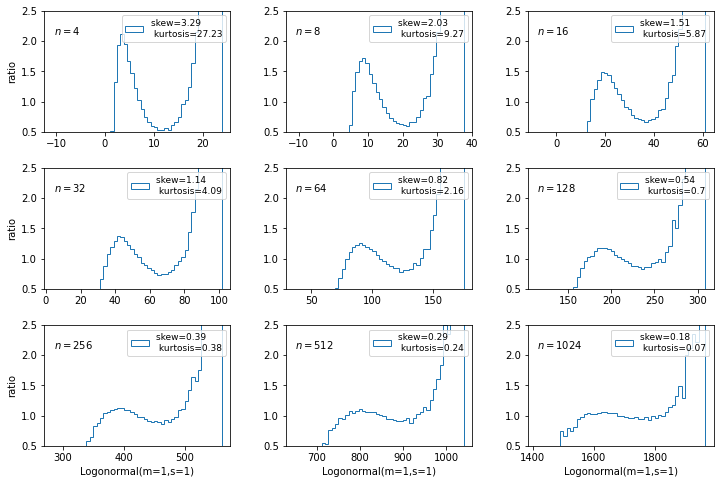

In [6]:
ntrials = 100000
nsamp = [4,8,16,32,64,128,256,512,1024]
lnorm = sps.lognorm(loc=0,scale=1,s=1)
l_var = lnorm.var()
l_mean = lnorm.mean()
n = 0
fig, ax = plt.subplots(3,3, figsize=(12,8))
fig.subplots_adjust(wspace=0.3,hspace=0.3)

for i in range(3):
    for j in range(3):
        l_rand = lnorm.rvs(size=(ntrials,nsamp[n]))
        exp_var = nsamp[n]*l_var
        exp_mean = nsamp[n]*l_mean
        nd = sps.norm(loc=exp_mean,scale=np.sqrt(exp_var))
        plot_range = (exp_mean-4*np.sqrt(exp_var),exp_mean+4*np.sqrt(exp_var))
        dens, edges = np.histogram(np.sum(l_rand,axis=1), bins=50, range=plot_range,density=True)
        norm_pdf = (nd.cdf(edges[1:])-nd.cdf(edges[:-1]))/np.diff(edges)
        
        skew=sps.stats.skew(np.sum(l_rand,axis=1))
        kurtosis=sps.stats.kurtosis(np.sum(l_rand,axis=1))
        label_txt = r"skew="+str(np.round(skew,2))+" \n kurtosis="+str(np.round(kurtosis,2))
        
        ax[i,j].hist((edges[1:]+edges[:-1])/2,bins=edges,weights=dens/norm_pdf,density=False,
                     histtype='step',label=label_txt)
        ax[i,j].text(0.05,0.8,"$n=$"+str(nsamp[n]),transform=ax[i,j].transAxes)
        ax[i,j].legend(fontsize=9,loc='best')
        n = n + 1
        ax[i,j].set_ylim(0.5,2.5)
        if j == 0:
            ax[i,j].set_ylabel('ratio')
        if i == 2:
            ax[i,j].set_xlabel("Logonormal(m=1,s=1)")
plt.show()

Skewness measures how skewed (asymmetric) the distribution is around the mean and kurtosis measures how $`heavy-tailed’$ the distribution is.The high value of skewness in the second case shows that the distribution is highly
assymetric to "high" values and the high value of kurtosis shows that the assymetry is very high.So in the second
case the normal distribution is reached for bigger samples than the first case,so the higher the skewness and
kurtosis value the higher size of sample is needed for the central limit theorem to be seen.
We can see that as the size of the sum's sizes is increased both skewness and kurtosis tend to zero as expected to tend to the respected values of the normal distribution.Also, the skewness as the sample's sizes is increased thend to zero slower than kurtosis.

In the size of sample the number 100000 used due to practical computer power limitations,with a size of 1000000 better agreement with the normal distribution would be expected.

#  Exercise 4:

Mean of x= 2.1337343013703842
Mean of y= 1.447525935462817
Covariance of x= 0.3648263469451166
Covariance of y= 0.12698162656052614
Covariance of x,y= 0.11579110935879768
kurtosis: x: 5.862817837747256   y: 0.19600598367375133
skewness: x: 1.744896843584036   y: 0.18382457543427794


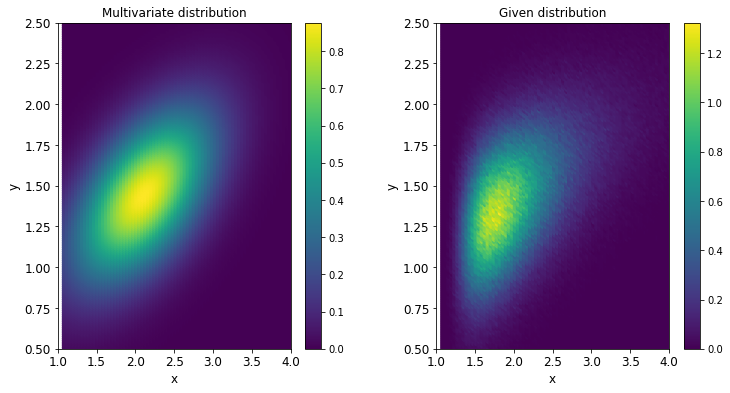

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

ntrials = 1000000

x = sps.lognorm.rvs(loc=1,s=0.5,size=ntrials)
y = np.sqrt(x)+sps.norm.rvs(scale=0.3,size=ntrials)
mu_x=np.mean(x)
mu_y=np.mean(y)
cov=np.cov(x,y)
skew_x=sps.stats.skew(x)
skew_y=sps.stats.skew(y)
kurtosis_x=sps.stats.kurtosis(x)
kurtosis_y=sps.stats.kurtosis(y)
print('Mean of x=',mu_x)
print('Mean of y=',mu_y)
print('Covariance of x=',cov[0,0])
print('Covariance of y=',cov[1,1])
print('Covariance of x,y=',cov[1,0])
print("kurtosis: x:",kurtosis_x, "  y:",kurtosis_y)
print("skewness: x:",skew_x, "  y:",skew_y)

densities, xedges, yedges = np.histogram2d(x,y,bins=300,density=True)
xgrid, ygrid = np.meshgrid((xedges[1:]+xedges[:-1])/2,(yedges[1:]+yedges[:-1])/2,indexing='ij')
pos = np.dstack((xgrid, ygrid))
bvn = sps.multivariate_normal([np.mean(mu_x), np.mean(mu_y)],cov)
sc1=ax1.scatter(xgrid, ygrid,c=bvn.pdf(pos))
plt.colorbar(sc1, ax=ax1)
ax1.set_title("Multivariate distribution")
sc2=ax2.scatter(xgrid,ygrid,c=densities)
plt.colorbar(sc2, ax=ax2)
ax2.set_title("Given distribution")

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("y", fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.set_xlim(1,4)
    ax.set_ylim(0.5,2.5)

plt.show()

We can see that kurtosis and skewness of the given distribution are much higher than zero and so it is not simillar to a multivariate distribution.Also the difference of the two distributions is obvious from the histograms above. Below we can see that the means of a sample from the given distribution is very close to a multivariate distribution since kurtosis and skewness are close to zero.

Mean of means of x= 2.1331348364822973
Mean of means of y= 1.4477560470001594
Covariance of mean of x= 0.0018135687091845435
Covariance of mean of y= 0.000634306547573547
Covariance of means of x,y= 0.0005739560317080635
kurtosis: mean of x: -0.0033729677787874834   y: -0.006651115899814819
skewness: mean of x: 0.113000171678102   y: 0.0010814417086774128


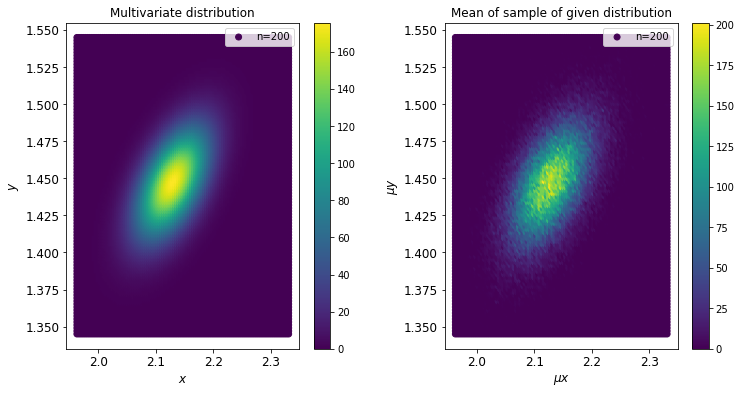

In [8]:
ntrials = 100000
nsamp=200
x = sps.lognorm.rvs(loc=1,s=0.5,size=(ntrials,nsamp))
y = np.sqrt(x)+sps.norm.rvs(scale=0.3,size=(ntrials,nsamp))
mu_x=np.sum(x,axis=1)/nsamp
mu_y=np.sum(y,axis=1)/nsamp
cov=np.cov(mu_x,mu_y)
skew_x=sps.stats.skew(mu_x)
skew_y=sps.stats.skew(mu_y)
kurtosis_x=sps.stats.kurtosis(mu_x)
kurtosis_y=sps.stats.kurtosis(mu_y)
print('Mean of means of x=',np.mean(mu_x))
print('Mean of means of y=',np.mean(mu_y))
print('Covariance of mean of x=',cov[0,0])
print('Covariance of mean of y=',cov[1,1])
print('Covariance of means of x,y=',cov[1,0])
print("kurtosis: mean of x:",kurtosis_x, "  y:",kurtosis_y)
print("skewness: mean of x:",skew_x, "  y:",skew_y)


densities, xedges, yedges = np.histogram2d(mu_x,mu_y,bins=100,density=True)
xgrid, ygrid = np.meshgrid((xedges[1:]+xedges[:-1])/2,(yedges[1:]+yedges[:-1])/2,indexing='ij')
pos = np.dstack((xgrid, ygrid))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

bvn = sps.multivariate_normal([np.mean(mu_x), np.mean(mu_y)],cov)
sc1=ax1.scatter(xgrid, ygrid,c=bvn.pdf(pos),label="n="+str(nsamp))
plt.colorbar(sc1, ax=ax1)
ax1.set_title("Multivariate distribution")
sc2=ax2.scatter(xgrid,ygrid,c=densities,label="n="+str(nsamp))
plt.colorbar(sc2, ax=ax2)
ax2.set_title("Mean of sample of given distribution")

ax2.set_xlabel(r"$\mu{x}$", fontsize=12)
ax2.set_ylabel(r"$\mu{y}$", fontsize=12)
    
ax1.set_xlabel("$x$", fontsize=12)
ax1.set_ylabel("$y$", fontsize=12)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

ax1.legend()
ax2.legend()
plt.show()

In [9]:
xypdf_mn = bvn.pdf(pos)
xpdf_mn = spint.simpson(xypdf_mn,ygrid,axis=1)
ypdf_mn = spint.simpson(xypdf_mn,xgrid,axis=0)

xypdf = densities
xpdf = spint.simpson(xypdf,ygrid,axis=1)
ypdf = spint.simpson(xypdf,xgrid,axis=0)

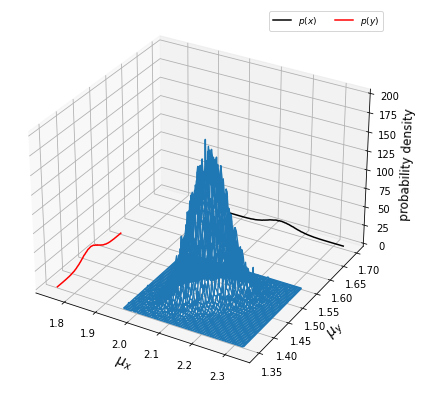

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.plot3D(xgrid[:,0],np.full(len(xpdf),1.7),xpdf,color='black',label=r'$p(x)$')
ax.plot3D(np.full(len(ypdf),1.75),ygrid[0,:],ypdf,color='red',label=r'$p(y)$')
ax.plot_wireframe(xgrid, ygrid, xypdf )

ax.set_xlabel(r'$\mu_{x}$',fontsize=14)
ax.set_ylabel(r'$\mu_{y}$',fontsize=14)
ax.set_zlabel(r'probability density',fontsize=12)
ax.legend(fontsize=9,ncol=2)
plt.show()

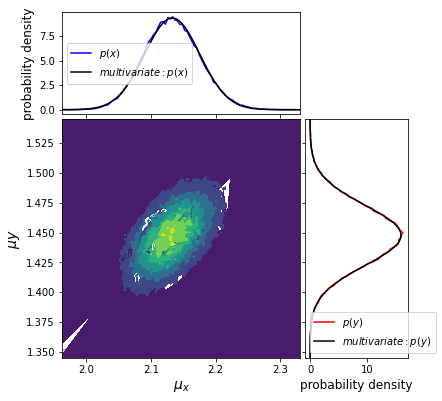

In [11]:
fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 3), height_ratios=(3, 7), left=0.1, right=0.9, 
                          bottom=0.1, top=0.9, wspace=0.03, hspace=0.03)
ax = fig.add_subplot(gs[1, 0])
ax_xpdfs = fig.add_subplot(gs[0, 0], sharex=ax)
ax_ypdfs = fig.add_subplot(gs[1, 1], sharey=ax)
ax_xpdfs.tick_params(axis="x", labelbottom=False)
ax_ypdfs.tick_params(axis="y", labelleft=False)
con = ax.contourf(xgrid, ygrid, xypdf) 
ax_xpdfs.plot(xgrid[:,0],xpdf,color='blue',label=r'$p(x)$')
ax_ypdfs.plot(ypdf,ygrid[0,:],color='red',label=r'$p(y)$')
ax_xpdfs.plot(xgrid[:,0],xpdf_mn,color='black',label=r'$multivariate:p(x)$')
ax_ypdfs.plot(ypdf_mn,ygrid[0,:],color='black',label=r'$multivariate:p(y)$')

ax.set_xlabel(r'$\mu_{x}$',fontsize=14)
ax.set_ylabel(r'$\mu{y}$',fontsize=14)
ax_xpdfs.set_ylabel(r'probability density',fontsize=12)
ax_ypdfs.set_xlabel(r'probability density',fontsize=12)
ax.clabel(con, inline=1, fontsize=8) 
ax_xpdfs.legend()
ax_ypdfs.legend()
plt.show()

<ipython-input-12-b0f322a1b986>:9: RuntimeWarning: divide by zero encountered in true_divide
  con = ax.contourf(xgrid, ygrid, (xypdf-xypdf_mn)/xypdf)
<ipython-input-12-b0f322a1b986>:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(con)
<ipython-input-12-b0f322a1b986>:11: RuntimeWarning: divide by zero encountered in true_divide
  ax_xpdfs.plot(xgrid[:,0],(xpdf-xpdf_mn)/xpdf,color='black')
<ipython-input-12-b0f322a1b986>:12: RuntimeWarning: divide by zero encountered in true_divide
  ax_ypdfs.plot((ypdf-ypdf_mn)/ypdf,ygrid[0,:],color='red')


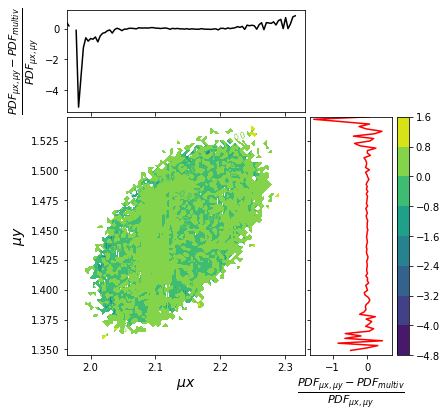

In [12]:
fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 3), height_ratios=(3, 7), left=0.1, right=0.9, 
                          bottom=0.1, top=0.9, wspace=0.03, hspace=0.03)
ax = fig.add_subplot(gs[1, 0])
ax_xpdfs = fig.add_subplot(gs[0, 0], sharex=ax)
ax_ypdfs = fig.add_subplot(gs[1, 1], sharey=ax)
ax_xpdfs.tick_params(axis="x", labelbottom=False)
ax_ypdfs.tick_params(axis="y", labelleft=False)
con = ax.contourf(xgrid, ygrid, (xypdf-xypdf_mn)/xypdf) 
plt.colorbar(con)
ax_xpdfs.plot(xgrid[:,0],(xpdf-xpdf_mn)/xpdf,color='black')
ax_ypdfs.plot((ypdf-ypdf_mn)/ypdf,ygrid[0,:],color='red')


ax.set_xlabel(r'$\mu{x}$',fontsize=14)
ax.set_ylabel(r'$\mu{y}$',fontsize=14)
ax_xpdfs.set_ylabel(r'$\frac{PDF_{\mu{x},\mu{y}}-PDF_{multiv}}{PDF_{\mu{x},\mu{y}}}$',fontsize=16)
ax_ypdfs.set_xlabel(r'$\frac{PDF_{\mu{x},\mu{y}}-PDF_{multiv}}{PDF_{\mu{x},\mu{y}}}$',fontsize=16)
ax.clabel(con, inline=1, fontsize=8) 

plt.show()

From the plots above it is shown that there is a great agreement between the two distributions.Below different sample sizes for obtaining the mean were tested.

For n=300:
kurtosis: mean of x: 0.018757230632214572   y: -0.004621646110694488
skewness: mean of x: 0.06056155398906121   y: 0.007273865981004573


<ipython-input-13-8b96be42acc3>:36: RuntimeWarning: divide by zero encountered in true_divide
  con = ax.contourf(xgrid, ygrid, (xypdf-xypdf_mn)/xypdf, label="n=300")
<ipython-input-13-8b96be42acc3>:36: UserWarning: The following kwargs were not used by contour: 'label'
  con = ax.contourf(xgrid, ygrid, (xypdf-xypdf_mn)/xypdf, label="n=300")
<ipython-input-13-8b96be42acc3>:37: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(con)
<ipython-input-13-8b96be42acc3>:38: RuntimeWarning: divide by zero encountered in true_divide
  ax_xpdfs.plot(xgrid[:,0],(xpdf-xpdf_mn)/xpdf,color='black')
<ipython-input-13-8b96be42acc3>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax_ypdfs.plot((ypdf-ypdf_mn)/ypdf,ygrid[0,:],color='red')


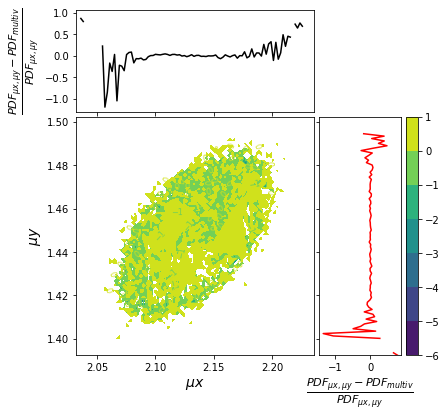

In [13]:
ntrials = 100000
nsamp=800
x = sps.lognorm.rvs(loc=1,s=0.5,size=(ntrials,nsamp))
y = np.sqrt(x)+sps.norm.rvs(scale=0.3,size=(ntrials,nsamp))
mu_x=np.sum(x,axis=1)/nsamp
mu_y=np.sum(y,axis=1)/nsamp
cov=np.cov(mu_x,mu_y)
skew_x=sps.stats.skew(mu_x)
skew_y=sps.stats.skew(mu_y)
kurtosis_x=sps.stats.kurtosis(mu_x)
kurtosis_y=sps.stats.kurtosis(mu_y)
print("For n=300:")
print("kurtosis: mean of x:",kurtosis_x, "  y:",kurtosis_y)
print("skewness: mean of x:",skew_x, "  y:",skew_y)

densities, xedges, yedges = np.histogram2d(mu_x,mu_y,bins=100,density=True)
xgrid, ygrid = np.meshgrid((xedges[1:]+xedges[:-1])/2,(yedges[1:]+yedges[:-1])/2,indexing='ij')
pos = np.dstack((xgrid, ygrid))
bvn = sps.multivariate_normal([np.mean(mu_x), np.mean(mu_y)],cov)
xypdf_mn = bvn.pdf(pos)
xpdf_mn = spint.simpson(xypdf_mn,ygrid,axis=1)
ypdf_mn = spint.simpson(xypdf_mn,xgrid,axis=0)

xypdf = densities
xpdf = spint.simpson(xypdf,ygrid,axis=1)
ypdf = spint.simpson(xypdf,xgrid,axis=0)

fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 3), height_ratios=(3, 7), left=0.1, right=0.9, 
                          bottom=0.1, top=0.9, wspace=0.03, hspace=0.03)
ax = fig.add_subplot(gs[1, 0])
ax_xpdfs = fig.add_subplot(gs[0, 0], sharex=ax)
ax_ypdfs = fig.add_subplot(gs[1, 1], sharey=ax)
ax_xpdfs.tick_params(axis="x", labelbottom=False)
ax_ypdfs.tick_params(axis="y", labelleft=False)
con = ax.contourf(xgrid, ygrid, (xypdf-xypdf_mn)/xypdf, label="n=300") 
plt.colorbar(con)
ax_xpdfs.plot(xgrid[:,0],(xpdf-xpdf_mn)/xpdf,color='black')
ax_ypdfs.plot((ypdf-ypdf_mn)/ypdf,ygrid[0,:],color='red')


ax.set_xlabel(r'$\mu{x}$',fontsize=14)
ax.set_ylabel(r'$\mu{y}$',fontsize=14)
ax_xpdfs.set_ylabel(r'$\frac{PDF_{\mu{x},\mu{y}}-PDF_{multiv}}{PDF_{\mu{x},\mu{y}}}$',fontsize=16)
ax_ypdfs.set_xlabel(r'$\frac{PDF_{\mu{x},\mu{y}}-PDF_{multiv}}{PDF_{\mu{x},\mu{y}}}$',fontsize=16)
ax.clabel(con, inline=1, fontsize=8) 

plt.show()


For n=30:
kurtosis: mean of x: 0.1982997093644996   y: -0.01507661016005235
skewness: mean of x: 0.32010158309391423   y: 0.041657405294173555


<ipython-input-14-8561273a28f1>:36: RuntimeWarning: divide by zero encountered in true_divide
  con = ax.contourf(xgrid, ygrid, (xypdf-xypdf_mn)/xypdf)
<ipython-input-14-8561273a28f1>:37: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(con)
<ipython-input-14-8561273a28f1>:38: RuntimeWarning: divide by zero encountered in true_divide
  ax_xpdfs.plot(xgrid[:,0],(xpdf-xpdf_mn)/xpdf,color='black')
<ipython-input-14-8561273a28f1>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax_ypdfs.plot((ypdf-ypdf_mn)/ypdf,ygrid[0,:],color='red')


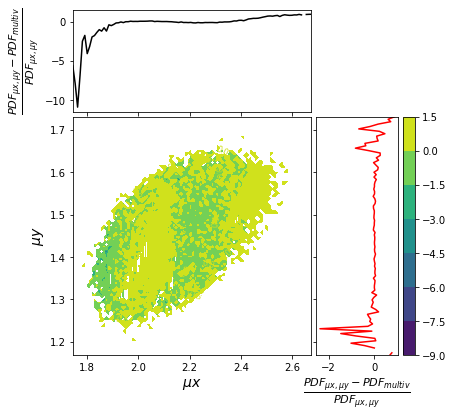

In [14]:
ntrials = 100000
nsamp=30
x = sps.lognorm.rvs(loc=1,s=0.5,size=(ntrials,nsamp))
y = np.sqrt(x)+sps.norm.rvs(scale=0.3,size=(ntrials,nsamp))
mu_x=np.sum(x,axis=1)/nsamp
mu_y=np.sum(y,axis=1)/nsamp
cov=np.cov(mu_x,mu_y)
skew_x=sps.stats.skew(mu_x)
skew_y=sps.stats.skew(mu_y)
kurtosis_x=sps.stats.kurtosis(mu_x)
kurtosis_y=sps.stats.kurtosis(mu_y)
print("For n=30:")
print("kurtosis: mean of x:",kurtosis_x, "  y:",kurtosis_y)
print("skewness: mean of x:",skew_x, "  y:",skew_y)

densities, xedges, yedges = np.histogram2d(mu_x,mu_y,bins=100,density=True)
xgrid, ygrid = np.meshgrid((xedges[1:]+xedges[:-1])/2,(yedges[1:]+yedges[:-1])/2,indexing='ij')
pos = np.dstack((xgrid, ygrid))
bvn = sps.multivariate_normal([np.mean(mu_x), np.mean(mu_y)],cov)
xypdf_mn = bvn.pdf(pos)
xpdf_mn = spint.simpson(xypdf_mn,ygrid,axis=1)
ypdf_mn = spint.simpson(xypdf_mn,xgrid,axis=0)

xypdf = densities
xpdf = spint.simpson(xypdf,ygrid,axis=1)
ypdf = spint.simpson(xypdf,xgrid,axis=0)

fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 3), height_ratios=(3, 7), left=0.1, right=0.9, 
                          bottom=0.1, top=0.9, wspace=0.03, hspace=0.03)
ax = fig.add_subplot(gs[1, 0])
ax_xpdfs = fig.add_subplot(gs[0, 0], sharex=ax)
ax_ypdfs = fig.add_subplot(gs[1, 1], sharey=ax)
ax_xpdfs.tick_params(axis="x", labelbottom=False)
ax_ypdfs.tick_params(axis="y", labelleft=False)
con = ax.contourf(xgrid, ygrid, (xypdf-xypdf_mn)/xypdf) 
plt.colorbar(con)
ax_xpdfs.plot(xgrid[:,0],(xpdf-xpdf_mn)/xpdf,color='black')
ax_ypdfs.plot((ypdf-ypdf_mn)/ypdf,ygrid[0,:],color='red')


ax.set_xlabel(r'$\mu{x}$',fontsize=14)
ax.set_ylabel(r'$\mu{y}$',fontsize=14)
ax_xpdfs.set_ylabel(r'$\frac{PDF_{\mu{x},\mu{y}}-PDF_{multiv}}{PDF_{\mu{x},\mu{y}}}$',fontsize=16)
ax_ypdfs.set_xlabel(r'$\frac{PDF_{\mu{x},\mu{y}}-PDF_{multiv}}{PDF_{\mu{x},\mu{y}}}$',fontsize=16)
ax.clabel(con, inline=1, fontsize=8) 

plt.show()

From the plots of the difference between the two distribution and the values of kurtosis and skewness we can see that the agreement seem to have limitations since it is not increased by increasing the sample's sizes.This is expected since there is a dependency between x and y by the way of their definition,while one of the main assumptions of the central limit theorem is that the sample values must be independent of each other.

# Exercise 5:

For the calculation of p(g|T) below the p(g) was considered uniform and so in the Bayes formula is not having any efffect.

In [15]:
T=np.array([1.98,2.00,2.05,1.99])
error=np.array([0.02,0.01,0.03,0.02])
T=T.reshape(4,1)
error=error.reshape(4,1)

T_2=np.array([1.98,2.00,2.05,1.99,2.004])
error_2=np.array([0.02,0.01,0.03,0.02,0.001])
T_2=T_2.reshape(5,1)
error_2=error_2.reshape(5,1)
def g_to_T(g):
    return 2*np.pi*(1/np.sqrt(g))

<ipython-input-16-b800e0bbec91>:3: RuntimeWarning: divide by zero encountered in log
  loglikel_prior = np.sum(np.log(sps.norm.pdf(x=g_to_T(g_random).reshape(len(g_to_T(g_random)),1),loc=T.reshape(1,len(T)),
<ipython-input-16-b800e0bbec91>:12: RuntimeWarning: divide by zero encountered in log
  loglikel_prior_2 = np.sum(np.log(sps.norm.pdf(x=g_to_T(g_random).reshape(len(g_to_T(g_random)),1),loc=T_2.reshape(1,len(T_2)),


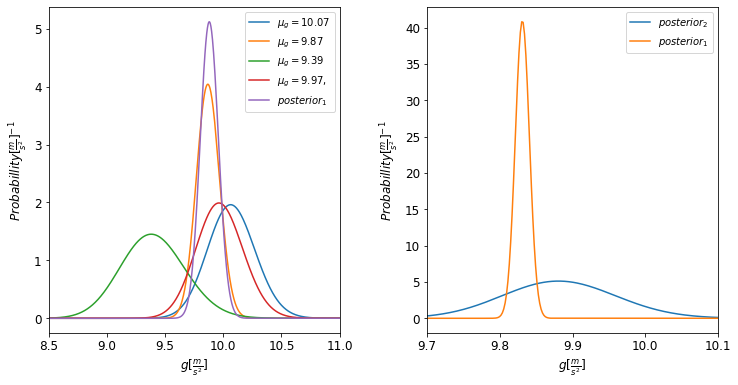

First case:
g =  9.88198737690055 ± 0.07790747497783479
Second case:
g =  9.831061334808403 ± 0.009733757776760691


In [16]:
g_random=np.linspace(20,1,10000)
prior = 1/20
loglikel_prior = np.sum(np.log(sps.norm.pdf(x=g_to_T(g_random).reshape(len(g_to_T(g_random)),1),loc=T.reshape(1,len(T)),
                                            scale=error.reshape(1,len(T)))),axis=1) + np.log(prior)

pdf_measures = sps.norm.pdf(x=g_to_T(g_random).reshape(len(g_to_T(g_random)),1),loc=T.reshape(1,len(T)),scale=error.reshape(1,len(T)))
likel_prior = np.exp(loglikel_prior-np.amax(loglikel_prior))
likel_prior_int =  spint.simps(likel_prior,g_to_T(g_random))
posterior_pdf_T=likel_prior/likel_prior_int
posterior_pdf=posterior_pdf_T*np.pi*g_random**(-3/2)

loglikel_prior_2 = np.sum(np.log(sps.norm.pdf(x=g_to_T(g_random).reshape(len(g_to_T(g_random)),1),loc=T_2.reshape(1,len(T_2)),
                                            scale=error_2.reshape(1,len(T_2)))),axis=1) + np.log(prior)

likel_prior_2 = np.exp(loglikel_prior_2-np.amax(loglikel_prior_2))
likel_prior_int_2 = spint.simps(likel_prior_2,g_to_T(g_random))
posterior_pdf_T_2=likel_prior_2/likel_prior_int_2
posterior_pdf_2=np.pi*g_random**(-3/2)*posterior_pdf_T_2

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$g [\frac{m}{s^{2}}]$',fontsize=12)
    ax.set_ylabel(r'$Probabillity [\frac{m}{s^{2}}]^{-1}$',fontsize=12)

ax1.plot(g_random,pdf_measures[:,0]*np.pi*g_random**(-3/2))
ax1.plot(g_random,pdf_measures[:,1]*np.pi*g_random**(-3/2))
ax1.plot(g_random,pdf_measures[:,2]*np.pi*g_random**(-3/2))
ax1.plot(g_random,pdf_measures[:,3]*np.pi*g_random**(-3/2))
ax1.plot(g_random,posterior_pdf)
ax1.legend([r'$\mu_{g}=10.07$',r'$\mu_{g}=9.87$',r'$\mu_{g}=9.39$',r'$\mu_{g}=9.97,$',r"$posterior_{1}$"])
ax1.set_xlim(8.5,11)

ax2.plot(g_random,posterior_pdf)
ax2.plot(g_random,posterior_pdf_2)
ax2.legend([r"$posterior_{2}$",r"$posterior_{1}$"])
ax2.set_xlim(9.7,10.1)
plt.show()

g_random=g_random[::-1]
posterior_pdf=posterior_pdf[::-1]
posterior_pdf_2=posterior_pdf_2[::-1]
mean_1=spint.simps(g_random*posterior_pdf,g_random)
mean_2=spint.simps(g_random*posterior_pdf_2,g_random)
variance_1=spint.simps(posterior_pdf*(g_random-mean_1)**2,g_random)
variance_2=spint.simps(posterior_pdf_2*(g_random-mean_2)**2,g_random)
print("First case:")
print("g = ",mean_1,u"\u00B1",np.sqrt(variance_1))

print("Second case:")
print("g = ",mean_2,u"\u00B1",np.sqrt(variance_2))

Second approach:

<ipython-input-17-f516fb9d0d8c>:6: RuntimeWarning: divide by zero encountered in log
  loglikel_prior = np.sum(np.log(sps.norm.pdf(x=T_random.reshape(len(T_random),1),loc=T.reshape(1,len(T)),
<ipython-input-17-f516fb9d0d8c>:13: RuntimeWarning: divide by zero encountered in log
  loglikel_prior_2 = np.sum(np.log(sps.norm.pdf(x=T_random.reshape(len(T_random),1),loc=T_2.reshape(1,len(T_2)),


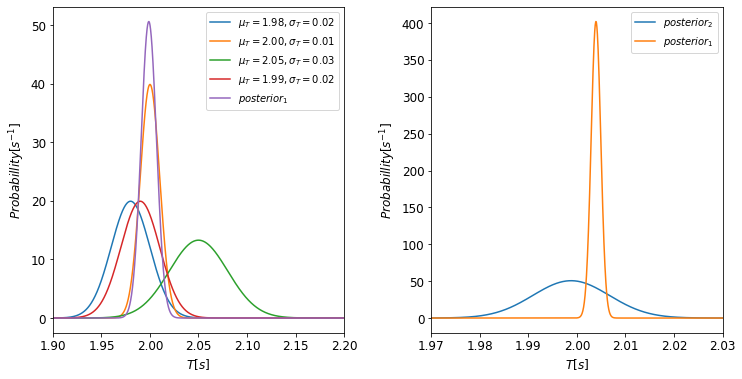

First case:
T =  1.9987931034482753 ± 0.007878385971583352
Second case:
T =  2.0039174412247127 ± 0.0009920404937148676


In [17]:
T_random=np.linspace(1,6,100000)
prior = 1/5
pdf_measures=sps.norm.pdf(x=T_random,loc=T,scale=error)

#First case of 4 measurements:
loglikel_prior = np.sum(np.log(sps.norm.pdf(x=T_random.reshape(len(T_random),1),loc=T.reshape(1,len(T)),
                                            scale=error.reshape(1,len(T)))),axis=1) + np.log(prior)
likel_prior = np.exp(loglikel_prior-np.amax(loglikel_prior))
likel_prior_int = spint.simps(likel_prior,T_random)
posterior_pdf=likel_prior/likel_prior_int

#Second case of 5 measurements with more accuracy:
loglikel_prior_2 = np.sum(np.log(sps.norm.pdf(x=T_random.reshape(len(T_random),1),loc=T_2.reshape(1,len(T_2)),
                                            scale=error_2.reshape(1,len(T_2)))),axis=1) + np.log(prior)
likel_prior_2 = np.exp(loglikel_prior_2-np.amax(loglikel_prior_2))
likel_prior_int_2 = spint.simps(likel_prior_2,T_random)
posterior_pdf_2=likel_prior_2/likel_prior_int_2

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$T[s]$',fontsize=12)
    ax.set_ylabel(r'$Probabillity [s^{-1}]$',fontsize=12)

ax1.plot(T_random,pdf_measures[0])
ax1.plot(T_random,pdf_measures[1])
ax1.plot(T_random,pdf_measures[2])
ax1.plot(T_random,pdf_measures[3])
ax1.plot(T_random,posterior_pdf)
ax1.legend([r'$\mu_{T}=1.98,\sigma_{T}=0.02$',r'$\mu_{T}=2.00,\sigma_{T}=0.01$',
           r'$\mu_{T}=2.05,\sigma_{T}=0.03$',r'$\mu_{T}=1.99,\sigma_{T}=0.02$',r"$posterior_{1}$"])
ax1.set_xlim(1.9,2.2)

ax2.plot(T_random,posterior_pdf)
ax2.plot(T_random,posterior_pdf_2)
ax2.legend([r"$posterior_{2}$",r"$posterior_{1}$"])
ax2.set_xlim(1.97,2.03)
plt.show()

#Mean and variance of the two plotted pdf: 
mean_1=spint.simps(T_random*posterior_pdf,T_random)
mean_2=spint.simps(T_random*posterior_pdf_2,T_random)
variance_1=spint.simps(posterior_pdf*(T_random-mean_1)**2,T_random)
variance_2=spint.simps(posterior_pdf_2*(T_random-mean_2)**2,T_random)

print("First case:")
print("T = ",mean_1,u"\u00B1",np.sqrt(variance_1))
print("Second case:")
print("T = ",mean_2,u"\u00B1",np.sqrt(variance_2))

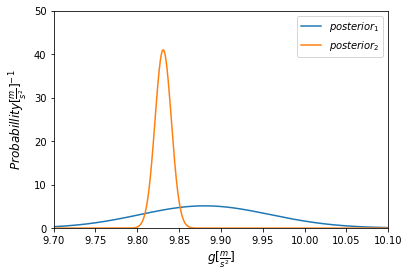

First case:
g =  9.881987376900474 ± 0.0779074749778344
Second case:
g =  9.831061334808274 ± 0.009733757776760906


In [18]:
#Transorfming T_random to g_random:
g_random=1/((T_random/(2*np.pi))**2)

g_random=g_random[::-1]
posterior_pdf_r=posterior_pdf[::-1]
posterior_pdf_2_r=posterior_pdf_2[::-1]

#Multiplying the previous pfds with dT/dg due to the variable transformation:
posterior_pdf_g=np.pi*g_random**(-3/2)*posterior_pdf_r
posterior_pdf_g2=np.pi*g_random**(-3/2)*posterior_pdf_2_r

plt.figure()
plt.plot(g_random,posterior_pdf_g)
plt.plot(g_random,posterior_pdf_g2)
plt.xlabel(r'$g [\frac{m}{s^{2}}]$',fontsize=12)
plt.ylabel(r'$Probabillity [\frac{m}{s^{2}}]^{-1}$',fontsize=12)
plt.legend([r"$posterior_{1}$",r"$posterior_{2}$"])
plt.xlim(9.7,10.1)
plt.ylim(0,50)
plt.show(spint.simps(posterior_pdf_2,T_random))


mean_1=spint.simps(g_random*posterior_pdf_g,g_random)
mean_2=spint.simps(g_random*posterior_pdf_g2,g_random)
variance_1=spint.simps(posterior_pdf_g*(g_random-mean_1)**2,g_random)
variance_2=spint.simps(posterior_pdf_g2*(g_random-mean_2)**2,g_random)

print("First case:")
print("g = ",mean_1,u"\u00B1",np.sqrt(variance_1))

print("Second case:")
print("g = ",mean_2,u"\u00B1",np.sqrt(variance_2))

It is obvious from the P(g|T) plots that the second posterior with the addition of a highly accurate measurement that is much more precise with the error being much more lower(almost one magnitude lower). 

# Part B:

In [19]:
particle_1=np.loadtxt('particle_times1.txt')
particle_2=np.loadtxt('particle_times2.txt')
dt_1=particle_1[1:]-particle_1[:-1]
dt_2=particle_2[1:]-particle_2[:-1]

In [20]:
deadtime= np.linspace(0.01,1,1000)
lam = np.linspace(1,100,1000)
prior = 1/99

loglikel_prior = np.sum(np.log(sps.expon.pdf(dt_1.reshape(len(dt_1),1,1),loc=deadtime.reshape(1,len(deadtime),1),
                                             scale=1/lam.reshape(1,1,len(lam)))),axis=0) + np.log(prior)

likel_prior = np.exp(loglikel_prior-np.amax(loglikel_prior))
likel_prior_deadtime = spint.simps(likel_prior,lam,axis=1)
likel_prior_lam = spint.simps(likel_prior,deadtime,axis=0)
likel_prior_tot = spint.simps(likel_prior_deadtime,deadtime)
pdf_1 = likel_prior /likel_prior_tot

pdf_1_lam = spint.simps(pdf_1,lam,axis=1)
pdf_1_deadtime = spint.simps(pdf_1,deadtime,axis=0)

<ipython-input-20-9ec5851588fa>:5: RuntimeWarning: divide by zero encountered in log
  loglikel_prior = np.sum(np.log(sps.expon.pdf(dt_1.reshape(len(dt_1),1,1),loc=deadtime.reshape(1,len(deadtime),1),


In [21]:
deadtime_2= np.linspace(0.01,1,1000)
lam_2 = np.linspace(250,1500,1000)

prior_2 = 1/1250

loglikel_prior_2 = np.sum(np.log(sps.expon.pdf(dt_2.reshape(len(dt_2),1,1),loc=deadtime_2.reshape(1,len(deadtime_2),1),
                                             scale=1/lam_2.reshape(1,1,len(lam_2)))),axis=0) + np.log(prior_2)

likel_prior_2 = np.exp(loglikel_prior_2-np.amax(loglikel_prior_2))
likel_prior_int_2 = spint.simps(likel_prior_2,lam_2,axis=1)
likel_prior_tot_2 = spint.simps(likel_prior_int_2,deadtime_2)
pdf_2=likel_prior_2/likel_prior_tot



<ipython-input-21-5b26cc35e744>:6: RuntimeWarning: divide by zero encountered in log
  loglikel_prior_2 = np.sum(np.log(sps.expon.pdf(dt_2.reshape(len(dt_2),1,1),loc=deadtime_2.reshape(1,len(deadtime_2),1),


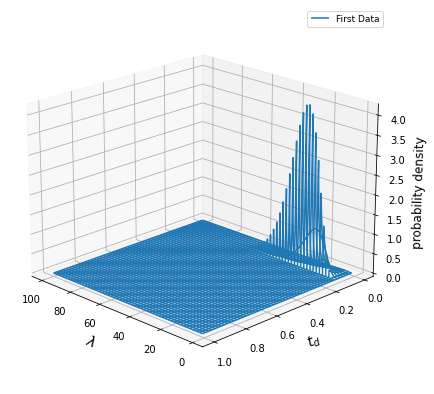

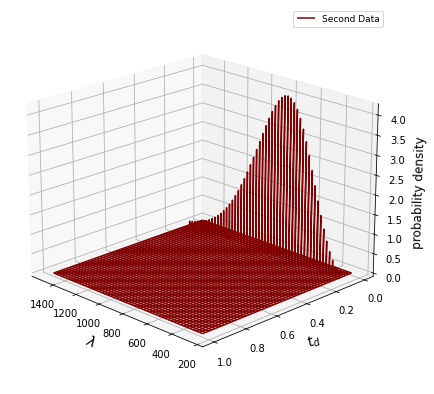

In [22]:
X,Y=np.meshgrid( lam,deadtime)
X_2,Y_2=np.meshgrid( lam_2,deadtime_2)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X,Y, pdf_1 )
ax.view_init(elev=20., azim=135)

ax.set_ylabel(r'$t_{d}$',fontsize=14)
ax.set_xlabel(r'$\lambda$',fontsize=14)
ax.set_zlabel(r'probability density',fontsize=12)
ax.legend(["First Data"],fontsize=9,ncol=2)
plt.show()

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X_2,Y_2, pdf_2,color='maroon' )
ax.view_init(elev=20., azim=135)

ax.set_ylabel(r'$t_{d}$',fontsize=14)
ax.set_xlabel(r'$\lambda$',fontsize=14)
ax.set_zlabel(r'probability density',fontsize=12)
ax.legend(["Second Data"],fontsize=9,ncol=2)
plt.show()


## 3)

First case:
λ =  19.770157284770388 ± 8.806553719156394
t_d =  0.11315632250910995 ± 0.014323092660832797


Text(0, 0.5, 'Probability')

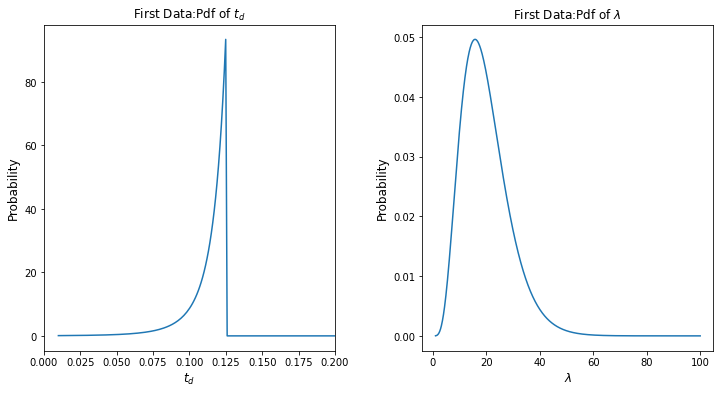

In [23]:
pdf_1_deadtime = spint.simps(pdf_1,lam,axis=1)
pdf_1_deadtime =pdf_1_deadtime/spint.simps(pdf_1_deadtime,deadtime)
pdf_1_lam = spint.simps(pdf_1,deadtime,axis=0)
pdf_1_lam = pdf_1_lam/spint.simps(pdf_1_lam,lam)

mean_lam_1=spint.simps(lam*pdf_1_lam,lam)
mean_deadtime_1=spint.simps(deadtime*pdf_1_deadtime,deadtime)
variance_lam_1=spint.simpson(pdf_1_lam*(lam-mean_lam_1)**2,lam)
variance_deadtime_1=spint.simpson(pdf_1_deadtime*(deadtime-mean_deadtime_1)**2,deadtime)

print("First case:")
print("λ = ",mean_lam_1,u"\u00B1",np.sqrt(variance_lam_1))
print("t_d = ",mean_deadtime_1,u"\u00B1",np.sqrt(variance_deadtime_1))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

ax1.plot(deadtime,pdf_1_deadtime)
ax1.set_title(r"First Data:Pdf of $t_{d}$")
ax2.plot(lam,pdf_1_lam)
ax2.set_title(r"First Data:Pdf of $\lambda$")
ax1.set_xlim(0,0.2)
ax1.set_xlabel(r"$t_{d}$", fontsize=12)
ax2.set_xlabel(r"$\lambda$", fontsize=12)
ax1.set_ylabel("Probability", fontsize=12)
ax2.set_ylabel("Probability", fontsize=12)

Second case:
λ =  749.8816050349025 ± 229.93117054399394
t_d =  0.10116541149280833 ± 7.754348898181515e-05


Text(0, 0.5, 'Probability')

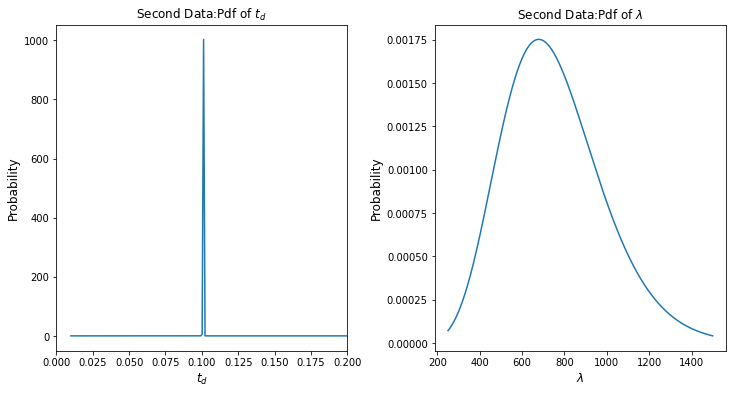

In [24]:
pdf_2_deadtime= spint.simps(pdf_2,lam_2,axis=1)
pdf_2_deadtime=pdf_2_deadtime/spint.simps(pdf_2_deadtime,deadtime_2)
pdf_2_lam= spint.simps(pdf_2,deadtime_2,axis=0)
pdf_2_lam=pdf_2_lam/spint.simps(pdf_2_lam,lam_2)

mean_lam_2=spint.simps(lam_2*pdf_2_lam,lam_2)
mean_deadtime_2=spint.simps(deadtime_2*pdf_2_deadtime,deadtime_2)
variance_lam_2=spint.simpson(pdf_2_lam*(lam_2-mean_lam_2)**2,lam_2)
variance_deadtime_2=spint.simpson(pdf_2_deadtime*(deadtime_2-mean_deadtime_2)**2,deadtime_2)

print("Second case:")
print("λ = ",mean_lam_2,u"\u00B1",np.sqrt(variance_lam_2))
print("t_d = ",mean_deadtime_2,u"\u00B1",np.sqrt(variance_deadtime_2))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

ax1.plot(deadtime_2,pdf_2_deadtime)
ax1.set_title(r"Second Data:Pdf of $t_{d}$")
ax2.plot(lam_2,pdf_2_lam)
ax2.set_title(r"Second Data:Pdf of $\lambda$")
ax1.set_xlim(0,0.2)
ax1.set_xlabel(r"$t_{d}$", fontsize=12)
ax2.set_xlabel(r"$\lambda$", fontsize=12)
ax1.set_ylabel("Probability", fontsize=12)
ax2.set_ylabel("Probability", fontsize=12)

From the plots of deadtime posteriors for both data samples it is obvious that the deadtime of the second sample is much better constrainted with great accuracy with its error being several order of magnitudes smaller than the other one.Although this result could be evidence for a difference in the instrument deadtime between the two data sets,the deadtime of the second sample is still in the one sigma range of values of the deadtime of sample one and so the reffered evidence is not enough to prove a difference with certainty
Another interesting result is the big difference between the values of the rates of the two samples shown by the regarded posteriors,although such a big difference could not been observed by the raw data.

## 4) 


I assume now that the rate follows a uniform distribution and the deadtime follows a normal distribution with the given parameters:

$p(t| t_{d},\lambda)=p(t| t_{d}) * p(t|\lambda) =c \cdot N(μ_{t_{d}} ,σ_{t_{d}}^{2})$


$ p(t_{d},\lambda|t) = \frac{p(t| t_{d},\lambda) \cdot p(t_{d} ,\lambda)}{\int_{0}^{\infty} \int_{0}^{\infty} p(t| t_{d},\lambda) \cdot  p(t_{d},\lambda) dt_{d} d \lambda} = \frac{p(t| t_{d},\lambda) \cdot N(μ_{t_{d}} ,σ_{t_{d}}^{2})}{\int_{0}^{\infty} \int_{0}^{\infty} p(t| t_{d},\lambda) \cdot  N(μ_{t_{d}} ,σ_{t_{d}}^{2}) dt_{d} d \lambda} $

In [39]:
p_1_deadtime= sps.norm.pdf(deadtime,loc=0.097,scale=0.013)
prior_2=np.array(1000*[p_1_deadtime])
prior_2=prior_2.reshape(1000,1000)
prior_1 = 1/99
pdf=sps.expon.pdf(dt_1.reshape(len(dt_1),1,1),loc=deadtime.reshape(1,len(deadtime),1),scale=1/lam.reshape(1,1,len(lam)))


#for i in range(0,len(p_1_deadtime)):
#    pdf[:,i,:]=pdf[:,i,:]*p_1_deadtime[i]

loglikel_prior = np.sum(np.log(pdf),axis=0) + np.log(prior_1) + np.log(prior_2)

likel_prior = np.exp(loglikel_prior-np.amax(loglikel_prior))
likel_prior_deadtime = spint.simps(likel_prior,lam,axis=1)
likel_prior_lam = spint.simps(likel_prior,deadtime,axis=0)
likel_prior_tot = spint.simps(likel_prior_deadtime,deadtime)
pdf_3 = likel_prior /likel_prior_tot


#p_2_deadtime= sps.norm.pdf(deadtime_2,loc=0.097,scale=0.013)
pdf=sps.expon.pdf(dt_2.reshape(len(dt_2),1,1),loc=deadtime_2.reshape(1,len(deadtime_2),1),scale=1/lam_2.reshape(1,1,len(lam_2)))


#for i in range(0,len(p_2_deadtime)):
#    pdf[:,i,:]=pdf[:,i,:]*p_2_deadtime[i]
    
loglikel_prior = np.sum(np.log(pdf),axis=0) + np.log(prior_1)+ np.log(prior_2)

likel_prior = np.exp(loglikel_prior-np.amax(loglikel_prior))
likel_prior_deadtime = spint.simps(likel_prior,lam_2,axis=1)
likel_prior_lam = spint.simps(likel_prior,deadtime_2,axis=0)
likel_prior_tot = spint.simps(likel_prior_deadtime,deadtime_2)
pdf_4 = likel_prior /likel_prior_tot

<ipython-input-39-420eb94bcef1>:11: RuntimeWarning: divide by zero encountered in log
  loglikel_prior = np.sum(np.log(pdf),axis=0) + np.log(prior_1) + np.log(prior_2)
<ipython-input-39-420eb94bcef1>:27: RuntimeWarning: divide by zero encountered in log
  loglikel_prior = np.sum(np.log(pdf),axis=0) + np.log(prior_1)+ np.log(prior_2)


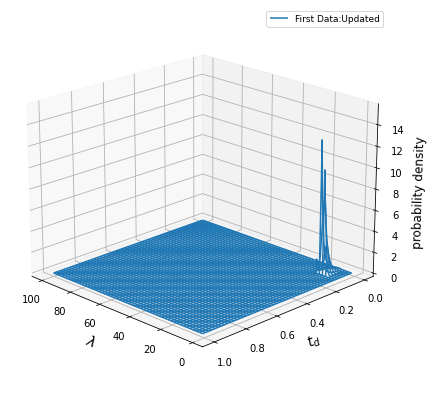

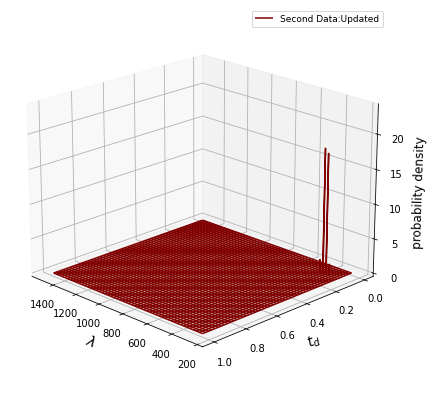

In [40]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X,Y, pdf_3 )
ax.view_init(elev=20., azim=135)

ax.set_ylabel(r'$t_{d}$',fontsize=14)
ax.set_xlabel(r'$\lambda$',fontsize=14)
ax.set_zlabel(r'probability density',fontsize=12)
ax.legend(["First Data:Updated"],fontsize=9,ncol=2)
plt.show()

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X_2,Y_2, pdf_4,color='maroon' )
ax.view_init(elev=20., azim=135)

ax.set_ylabel(r'$t_{d}$',fontsize=14)
ax.set_xlabel(r'$\lambda$',fontsize=14)
ax.set_zlabel(r'probability density',fontsize=12)
ax.legend(["Second Data:Updated"],fontsize=9,ncol=2)
plt.show()

First case:
λ =  9.96551176879227 ± 1.2545732956534223
t_d =  0.10552268146097725 ± 0.019317694935535003


Text(0, 0.5, 'Probability')

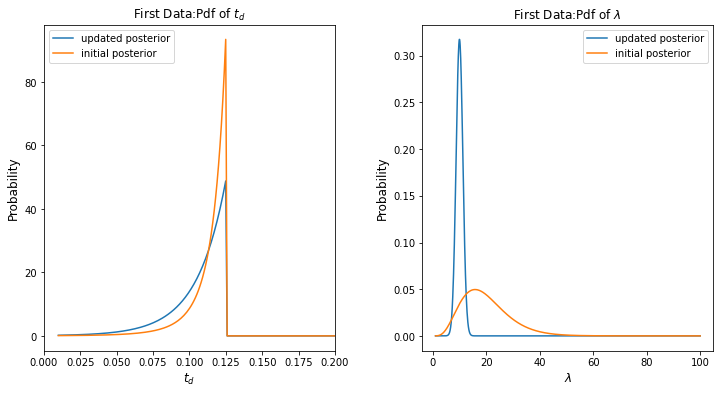

In [41]:
pdf_3_deadtime = spint.simps(pdf_3,lam,axis=1)
pdf_3_deadtime =pdf_3_deadtime/spint.simps(pdf_3_deadtime,deadtime)
pdf_3_lam = spint.simps(pdf_3,deadtime,axis=0)
pdf_3_lam = pdf_3_lam/spint.simps(pdf_3_lam,lam)

mean_lam_3=spint.simps(lam*pdf_3_lam,lam)
mean_deadtime_3=spint.simps(deadtime*pdf_3_deadtime,deadtime)
variance_lam_3=spint.simpson(pdf_3_lam*(lam-mean_lam_3)**2,lam)
variance_deadtime_3=spint.simpson(pdf_3_deadtime*(deadtime-mean_deadtime_3)**2,deadtime)

print("First case:")
print("λ = ",mean_lam_3,u"\u00B1",np.sqrt(variance_lam_3))
print("t_d = ",mean_deadtime_3,u"\u00B1",np.sqrt(variance_deadtime_3))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

ax1.plot(deadtime,pdf_3_deadtime)
ax1.plot(deadtime,pdf_1_deadtime)
ax1.legend(["updated posterior","initial posterior"])
ax1.set_title(r"First Data:Pdf of $t_{d}$")
ax2.plot(lam,pdf_3_lam)
ax2.plot(lam,pdf_1_lam)
ax2.legend(["updated posterior","initial posterior"])
ax2.set_title(r"First Data:Pdf of $\lambda$")
ax1.set_xlim(0,0.2)
ax1.set_xlabel(r"$t_{d}$", fontsize=12)
ax2.set_xlabel(r"$\lambda$", fontsize=12)
ax1.set_ylabel("Probability", fontsize=12)
ax2.set_ylabel("Probability", fontsize=12)

Second case:
λ =  362.87635499301007 ± 16.271569993717776
t_d =  0.10113014467419693 ± 0.00020595640359289706


Text(0, 0.5, 'Probability')

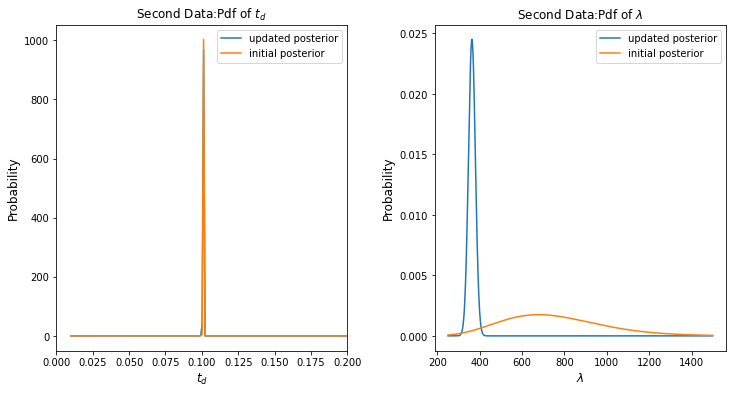

In [42]:
pdf_4_deadtime= spint.simps(pdf_4,lam_2,axis=1)
pdf_4_deadtime=pdf_4_deadtime/spint.simps(pdf_4_deadtime,deadtime_2)
pdf_4_lam= spint.simps(pdf_4,deadtime_2,axis=0)
pdf_4_lam= pdf_4_lam/spint.simps(pdf_4_lam,lam_2)

mean_lam_4=spint.simps(lam_2*pdf_4_lam,lam_2)
mean_deadtime_4=spint.simps(deadtime_2*pdf_4_deadtime,deadtime_2)
variance_lam_4=spint.simpson(pdf_4_lam*(lam_2-mean_lam_4)**2,lam_2)
variance_deadtime_4=spint.simpson(pdf_4_deadtime*(deadtime_2-mean_deadtime_4)**2,deadtime_2)

print("Second case:")
print("λ = ",mean_lam_4,u"\u00B1",np.sqrt(variance_lam_4))
print("t_d = ",mean_deadtime_4,u"\u00B1",np.sqrt(variance_deadtime_4))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)

ax1.plot(deadtime_2,pdf_4_deadtime)
ax1.plot(deadtime_2,pdf_2_deadtime)
ax1.legend(["updated posterior","initial posterior"])
ax1.set_title(r"Second Data:Pdf of $t_{d}$")
ax2.plot(lam_2,pdf_4_lam)
ax2.plot(lam_2,pdf_2_lam)
ax2.legend(["updated posterior","initial posterior"])
ax2.set_title(r"Second Data:Pdf of $\lambda$")
ax1.set_xlim(0,0.2)
ax1.set_xlabel(r"$t_{d}$", fontsize=12)
ax2.set_xlabel(r"$\lambda$", fontsize=12)
ax1.set_ylabel("Probability", fontsize=12)
ax2.set_ylabel("Probability", fontsize=12)

Text(0, 0.5, 'Probability')

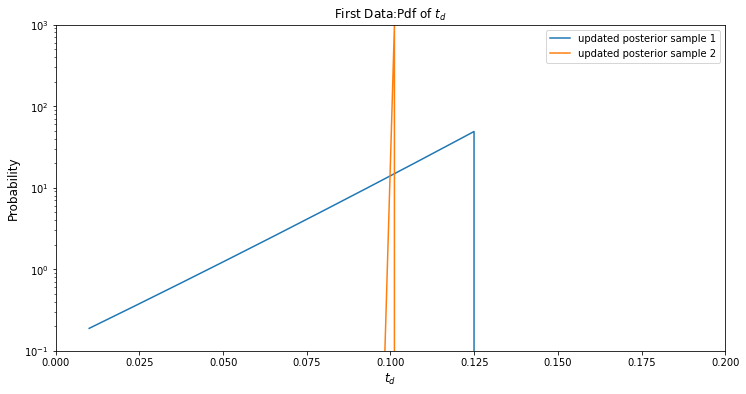

In [43]:
#Comparison between updated posteriord of t_d of the two data samples in logy scale:

plt.figure(figsize=(12,6))
plt.plot(deadtime,pdf_3_deadtime)
plt.plot(deadtime_2,pdf_4_deadtime)
plt.title(r"First Data:Pdf of $t_{d}$")
plt.legend(["updated posterior sample 1","updated posterior sample 2"])
plt.xlim(0,0.2)
plt.ylim(0.1,1000)
plt.xlabel(r"$t_{d}$", fontsize=12)
plt.yscale("log")
plt.ylabel("Probability", fontsize=12)